In [1]:
import yaml
import os
import datetime
import numpy as np
import csv
import pickle
from matplotlib import pyplot as plt 
import statistics 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from tabulate import tabulate
import math

import statsmodels.api as sm
from scipy.interpolate import interp1d

In [2]:
with open('dataofallmatchesinfirstfiveyears.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    matches1st5yrs = unpickler.load() 
    file.close()

In [3]:
with open('totalRuns1stInnings.pkl', 'rb') as file:#missing 
    unpickler = pickle.Unpickler(file)
    inningsTotals = unpickler.load() 
    file.close()

In [4]:
with open('finalXY1stInnings.pkl', 'rb') as file: #missing
    unpickler = pickle.Unpickler(file)
    loadVAr = unpickler.load() 
    file.close()
    finalX,finalY=loadVAr[0],loadVAr[1]

In [5]:
with open('OLS1stInnings.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    OLSdict = unpickler.load() 
    file.close()
    
def OLSpredict(ballRem=119,wicketRem=10,runScored=0):
    predictData=[1]
    for i in range(11):
        predictData.append(0)
    predictData[wicketRem+1]=1
    predictData.append(runScored)
    return OLSdict[ballRem].predict(predictData)[0]

In [94]:
print(OLSpredict(ballRem=100,wicketRem=10,runScored=30))

171.64083046997777


In [63]:
totalRunList=[]
winRunList=[]
winLossList=[]
for matchNo in range(len(matches1st5yrs)):
    ballKeys=list(matches1st5yrs[matchNo]['ourData'].keys())
    ballKeys.sort(reverse=True)
    totalRunList.append(matches1st5yrs[matchNo]['ourData'][ballKeys[-1]]['totalrunscount'])
    winLossList.append(matches1st5yrs[matchNo]['winLoss'])
    if matches1st5yrs[matchNo]['winLoss']=='win':
        winRunList.append(matches1st5yrs[matchNo]['ourData'][ballKeys[-1]]['totalrunscount'])
totalRunList, winLossList = zip(*sorted(zip(totalRunList, winLossList)))

In [60]:
q=20
WP,thisRangeHighest=[],[]
for j in range(q):
    print(\
              totalRunList[int((len(totalRunList)/q)*j)],\
              totalRunList[int((len(totalRunList)/q)*(j+1))-1],\
              round(len(list(filter(lambda x: (x == 'win'), winLossList[int((len(totalRunList)/q)*j):int((len(totalRunList)/q)*(j+1))+1])))/(len(totalRunList)/q),2))
    thisRangeHighest.append(totalRunList[int((len(totalRunList)/q)*(j+1))-1])
    WP.append(round(len(list(filter(lambda x: (x == 'win'), winLossList[int((len(totalRunList)/q)*j):int((len(totalRunList)/q)*(j+1))+1])))/(len(totalRunList)/q),2))

67 104 0.0
105 118 0.06
118 126 0.13
126 133 0.38
133 138 0.38
138 141 0.13
142 146 0.44
146 149 0.19
150 154 0.38
155 159 0.44
159 163 0.44
163 165 0.63
165 170 0.75
170 174 0.69
174 178 0.69
178 183 0.75
183 187 0.75
187 192 0.75
192 205 0.82
205 246 0.94


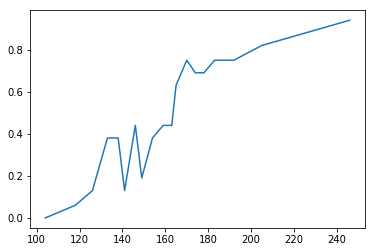

In [61]:
plt.plot(thisRangeHighest,WP)

In [ ]:
q=10
WP,thisRangeHighest=[],[]


startRange=list(numpy.arange(min(totalRunList),max(totalRunList),(max(totalRunList)-min(totalRunList))/q))
endRange=startRange[1:]
endRange.append(max(totalRunList)+1)

for j in range(q):
    len(list(filter(lambda x: (x == 'win'),winLossList[:])))

In [ ]:
list(filter(lambda x: (x > 150),     totalRunList

In [77]:
n, bins, patches = plt.hist(x=totalRunList, bins=30, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
n, bins, patches = plt.hist(x=winRunList, bins=20, color='#0ff4ba',
                            alpha=0.7, rwidth=0.85)

In [40]:
import scipy.stats as st
import numpy as np
import warnings

data=WP

x=np.array(thisRangeHighest)
y=np.array(WP)

# Distributions to check
DISTRIBUTIONS = [        
    st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
    st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
    st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
    st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
    st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
    st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
    st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
    st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
    st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
    st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
]

# Best holders
best_distribution = st.norm
best_params = (0.0, 1.0)
best_sse = np.inf

# Estimate distribution parameters from data
for distribution in DISTRIBUTIONS:

    # Try to fit the distribution
    try:
        
        
        # Ignore warnings from data that can't be fit
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore')

            # fit dist to data
            params = distribution.fit(data)

            # Separate parts of parameters
            arg = params[:-2]
            loc = params[-2]
            scale = params[-1]
    #         print(arg,loc,scale)
            # Calculate fitted PDF and error with fit in distribution
            pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
            sse = np.sum(np.power(y - pdf, 2.0))

            # if axis pass in add to plot
            try:
                if ax:
                    pd.Series(pdf, x).plot(ax=ax)
                end
            except Exception:
                pass

            # identify if this distribution is better
            if best_sse > sse > 0:
                best_distribution = distribution
                best_params = params
                best_sse = sse

    except Exception:
        pass

print (best_distribution.name, best_params)

levy (-0.04583812720924767, 0.2755896164220257)


In [42]:
m=best_params[0]
c=best_params[1]

In [49]:
p=172
round(np.sqrt(c/(2*math.pi))*(math.exp(-c/(2*(p-m)))/math.pow((p-m),1.5)),2)

0.0

In [50]:
import scipy.integrate as integrate
import scipy.special as special

In [53]:
integrate.quad(lambda x: x, 0, 4.5)

(10.125, 1.124100812432971e-13)

In [54]:
np.sqrt(c/(2*(p-m)))

20.25

In [58]:
(2/np.sqrt(math.pi))*integrate.quad(lambda x: np.exp(x*x*(-1)), 0, np.sqrt(c/(2*(p-m))))[0]

0.031925188372174264

In [55]:
np.exp(1)

2.718281828459045

In [9]:
# b:bvls remaining
#     b=20

meanErrorList=[]
Balls=[]
for b in range(119,1,-1):
    thisBallErrorList=[]
    for matchNo in range(len(matches1st5yrs)):
        
        ballKeys=list(matches1st5yrs[matchNo]['ourData'].keys())
        ballKeys.sort(reverse=True)
        totalRunInInnings=matches1st5yrs[matchNo]['ourData'][ballKeys[-1]]['totalrunscount']
        
        try:
            predictData=[1]
            for i in range(11):
                predictData.append(0)
            predictData[matches1st5yrs[matchNo]['ourData'][b]['wicketsremaining']+1]=1
            predictData.append(matches1st5yrs[matchNo]['ourData'][b]['totalrunscount'])

#             error=numpy.abs(totalRunInInnings-results[120-b].predict(predictData)[0])
            error=results[120-b].predict(predictData)[0]-172.5
            thisBallErrorList.append(error)
        except:
            None
        break
    meanErrorList.append(numpy.mean(thisBallErrorList))
    Balls.append(120-b)

In [10]:
fig=plt.figure(figsize=(15,10))
plt.plot(Balls[:-1],meanErrorList[:-1])
plt.show()
fig.savefig('meanError2.png', bbox_inches = 'tight',pad_inches = 0)

In [11]:

Balls=[]
differFromMedianList=[]
for b in range(119,-1,-1):
    totalRunInInnings=matches1st5yrs[matchNo]['ourData'][0]['totalrunscount']
    matchNo=0
    try:
        predictData=[1]
        for i in range(11):
            predictData.append(0)
        predictData[matches1st5yrs[matchNo]['ourData'][b]['wicketsremaining']+1]=1
        predictData.append(matches1st5yrs[matchNo]['ourData'][b]['totalrunscount'])

        differMedian=results[120-b].predict(predictData)[0]-172.5
        differFromMedianList.append(differMedian)
        Balls.append(120-b)
    except:
        differFromMedianList.append(differMedian)
        Balls.append(120-b)

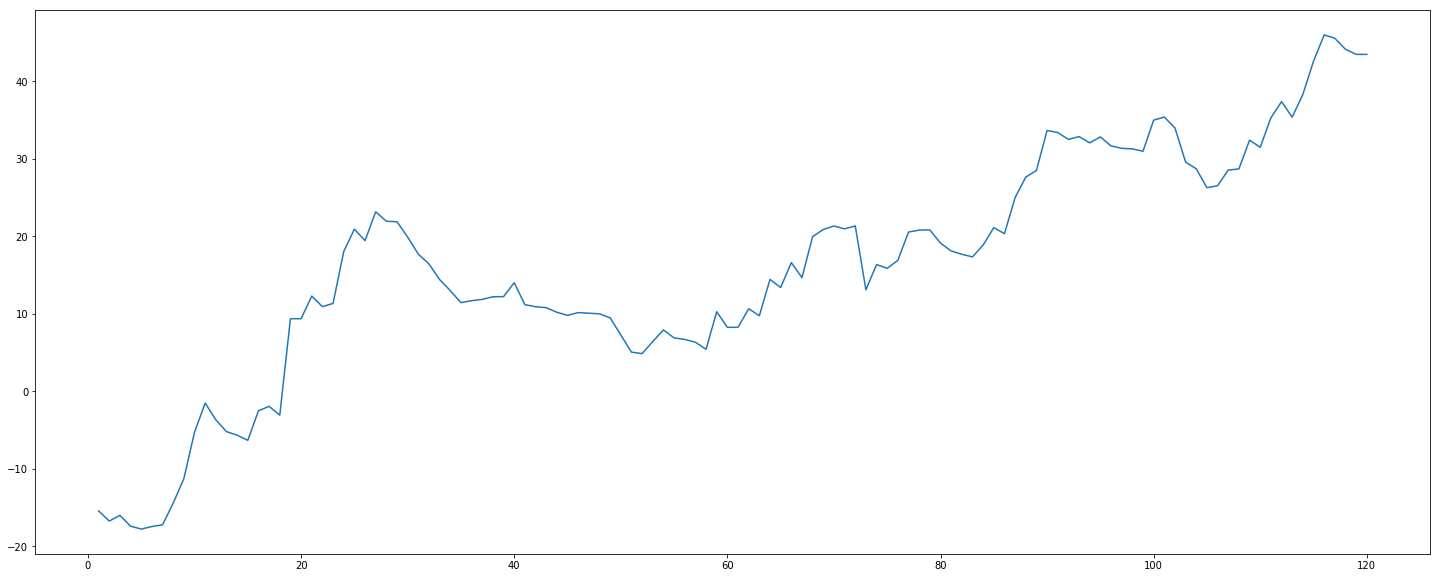

In [12]:
plt.figure(figsize=(25, 10)) 

plt.plot(Balls,differFromMedianList)

plt.show()

In [45]:
maxDict={}
minDict={}
differFromMedianList={}
for b in range(1,120):  #b: ball remaining
    differFromMedianListThisBall=[]


    for matchNo in range(len(matches1st5yrs)):
        ballKeys=list(matches1st5yrs[matchNo]['ourData'].keys())
        ballKeys.sort(reverse=True)
        totalRunInInnings=matches1st5yrs[matchNo]['ourData'][ballKeys[-1]]['totalrunscount']

        try:
            predictData=[1]
            for i in range(11):
                predictData.append(0)
            predictData[matches1st5yrs[matchNo]['ourData'][b]['wicketsremaining']+1]=1
            predictData.append(matches1st5yrs[matchNo]['ourData'][b]['totalrunscount'])

            differMedian=results[120-b].predict(predictData)[0]-172.5
            differFromMedianListThisBall.append(differMedian)
        except:
            None
    differFromMedianList[b]=differFromMedianListThisBall
    maxDict[b]=max(differFromMedianListThisBall)
    minDict[b]=min(differFromMedianListThisBall)

In [18]:
differFromMedianList[119]

[-15.450600196249667,
 -16.600073814933893,
 -16.600073814933893,
 -16.600073814933893,
 -15.450600196249667,
 -16.600073814933893,
 -16.600073814933893,
 -15.450600196249667,
 -16.600073814933893,
 -16.600073814933893,
 -15.450600196249667,
 -14.30112657756544,
 -16.600073814933893,
 -16.600073814933893,
 -15.450600196249667,
 -15.450600196249667,
 -15.450600196249667,
 -16.600073814933893,
 -16.600073814933893,
 -15.450600196249667,
 -16.600073814933893,
 -16.600073814933893,
 -16.600073814933893,
 -25.03119108745142,
 -15.450600196249667,
 -16.600073814933893,
 -16.600073814933893,
 -16.600073814933893,
 -16.600073814933893,
 -12.002179340197017,
 -16.600073814933893,
 -16.600073814933893,
 -12.002179340197017,
 -15.450600196249667,
 -15.450600196249667,
 -16.600073814933893,
 -14.30112657756544,
 -16.600073814933893,
 -16.600073814933893,
 -16.600073814933893,
 -12.002179340197017,
 -16.600073814933893,
 -16.600073814933893,
 -9.703232102828565,
 -16.600073814933893,
 -16.600073814

In [111]:
fig =plt.figure(figsize=(25, 10)) 
ax = fig.add_subplot(111)
Q=np.arange(5,6,1)
for Quartiles in Q:
    totalRunsFromMedian=[]
    for matchNo in range(len(matches1st5yrs)):  
        ballKeys=list(matches1st5yrs[matchNo]['ourData'].keys())
        ballKeys.sort(reverse=True)
        totalRunInInnings=matches1st5yrs[matchNo]['ourData'][ballKeys[-1]]['totalrunscount']  
        totalRunsFromMedian.append(totalRunInInnings-172.5)



    startRangeTFM=list(numpy.arange(min(totalRunsFromMedian),max(totalRunsFromMedian),(max(totalRunsFromMedian)-min(totalRunsFromMedian))/Quartiles))
    endRangeTFM=startRangeTFM[1:]
    endRangeTFM.append(max(totalRunsFromMedian)+1)

    # print(startRangeTFM,endRangeTFM)

    predList,Balls=[],[]
    for b in range(119,0,-1):
        startRange=list(numpy.arange(min(differFromMedianList[b]),max(differFromMedianList[b]),(max(differFromMedianList[b])-min(differFromMedianList[b]))/Quartiles))
        endRange=startRange[1:]
        endRange.append(max(differFromMedianList[b])+1)

        # for i in range(len(startRange)):
        #     startRange[i]=int(startRange[i])
        # startRange[0]-=1
        # for i in range(len(endRange)):
        #     endRange[i]=int(endRange[i])
        # endRange[0]-=1

        # print(startRange,endRange)


        state={}
        for matchNo in range(len(matches1st5yrs)):  
                state[matchNo]=''
                ballKeys=list(matches1st5yrs[matchNo]['ourData'].keys())
                ballKeys.sort(reverse=True)
                totalRunInInnings=matches1st5yrs[matchNo]['ourData'][ballKeys[-1]]['totalrunscount']  


                try:
                    predictData=[1]
                    for i in range(11):
                        predictData.append(0)
                    predictData[matches1st5yrs[matchNo]['ourData'][b]['wicketsremaining']+1]=1
                    predictData.append(matches1st5yrs[matchNo]['ourData'][b]['totalrunscount'])
                    predictedScore=results[120-b].predict(predictData)[0]

                    differMedian=predictedScore-172.5

                    for i in range(Quartiles):
                        if differMedian>=startRange[i] and differMedian<endRange[i]:
                            state[matchNo]+=str(i+1)
                            break
                    state[matchNo]+='_'
                    lastBallDiff=totalRunInInnings-172.5
                    for i in range(Quartiles):
                        if differMedian>=startRangeTFM[i] and differMedian<endRangeTFM[i]:
                            state[matchNo]+=str(i+1)
                            break
                except:
                    None

        count,totalMatchCount=0,0
        for k in list(state.keys()):
            try:
                if state[k].split('_')[0]==state[k].split('_')[1]:
#                 if np.abs(int(state[k].split('_')[0])-int(state[k].split('_')[1]))<=1:
                    count+=1
                totalMatchCount+=1
                r=count/totalMatchCount
            except:
                r=0
        predList.append(r)
        Balls.append(120-b)

    # print(predList)
    
    ax.plot(Balls,predList)
ax.legend(["No. of Quartile: " + str(s) for s in Q], loc ="lower right")
plt.title('Prob of Predicted Quartile being Correct Vs Ball Progression')
ax.text(.005, .02,'Shows the prediction model (OLS) is not working well for some specific phases of innings',transform=ax.transAxes,fontsize=13,style='italic')
plt.show()
fig.savefig('predictedQuartile.png', bbox_inches = 'tight',pad_inches = 0)

In [112]:
for q in range(Quartiles):
    print(len(list(filter(lambda x: (x >= startRangeTFM[q] and x<endRangeTFM[q]), totalRunsFromMedian))))

13
67
144
82
13


In [229]:
import scipy.stats as st
import warnings

In [242]:
differBalls,Balls=[],[]
totals=[]
for matchNo in range(len(matches1st5yrs)):
            ballKeys=list(matches1st5yrs[matchNo]['ourData'].keys())
            ballKeys.sort(reverse=True)
            totals.append(matches1st5yrs[matchNo]['ourData'][ballKeys[-1]]['totalrunscount'])


for b in range(119,0,-1):
    startRange=list(numpy.arange(minDict[b],maxDict[b],(maxDict[b]-minDict[b])/5))
    endRange=startRange[1:]
    endRange.append(maxDict[b]+1)

    # for i in range(len(startRange)):
    #     startRange[i]=int(startRange[i])
    # startRange[0]-=1
    # for i in range(len(endRange)):
    #     endRange[i]=int(endRange[i])
    # endRange[0]-=1

    # print(startRange,endRange)


    runUptoThisBallList,predictedScoreList,differList=[],[],[]
    for matchNo in range(len(matches1st5yrs)):
            try:
                predictData=[1]
                for i in range(11):
                    predictData.append(0)
                predictData[matches1st5yrs[matchNo]['ourData'][b]['wicketsremaining']+1]=1
                predictData.append(matches1st5yrs[matchNo]['ourData'][b]['totalrunscount'])

                predictedScore=results[120-b].predict(predictData)[0]
                
                predictedScoreList.append(predictedScore)
                
            except:
                None

    differBalls.append(np.mean(totals)/np.mean(predictedScoreList))
    Balls.append(120-b)
    
plt.plot(Balls,differBalls)
plt.show()

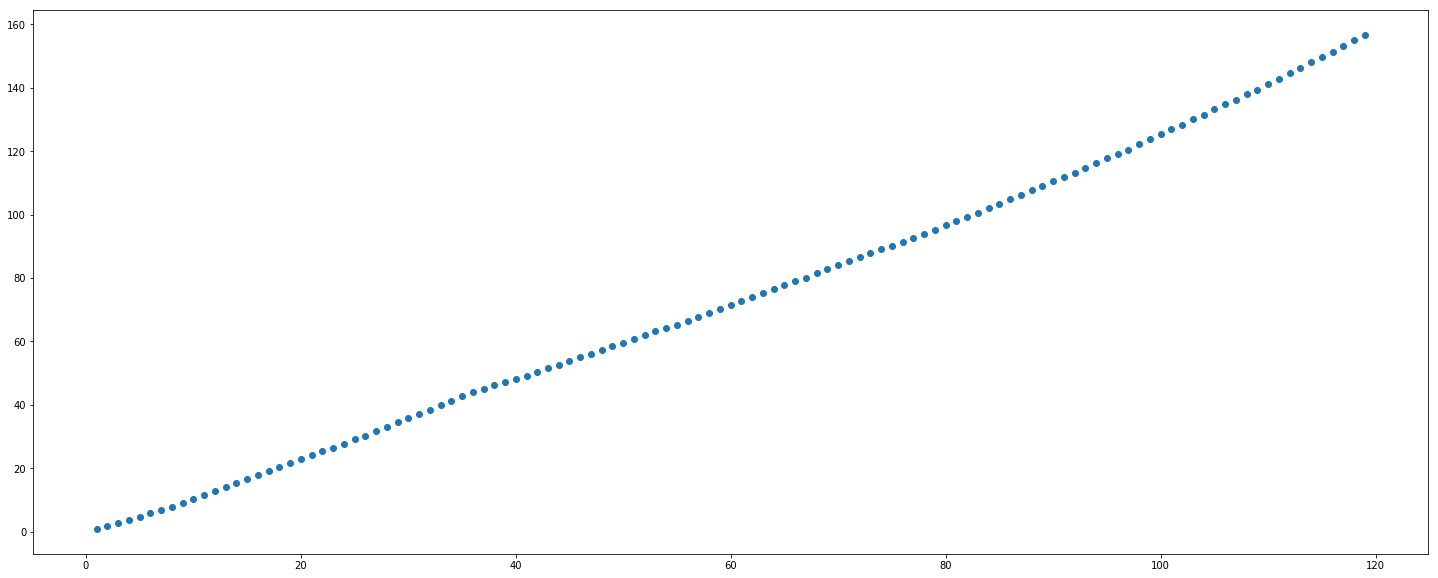

In [115]:
fig =plt.figure(figsize=(25, 10)) 
ax = fig.add_subplot(111)

avgRunList,Balls=[],[]
for b in range(119,0,-1):
    avgRun=[]
    for matchNo in range(len(matches1st5yrs)):  
        try:
            state[matchNo]=''
            avgRun.append(matches1st5yrs[matchNo]['ourData'][b]['totalrunscount'])
        except:
            None
    avgRunList.append(np.mean(avgRun))
    Balls.append(120-b)
    
ax.scatter(Balls,avgRunList)
plt.show()

In [34]:
F=[]
for b in range(119,0,-1):
    totalRunList=[]
    thisBallTotalList=[]
    predList=[]
    RMSList=[]
    matchNoList=[]
    for matchNo in range(len(matches1st5yrs)):
        matchNoList.append(matchNo)
        try:
            thisBallTotalList.append(matches1st5yrs[matchNo]['ourData'][b]['totalrunscount'])


            predictData=[1]
            for i in range(11):
                predictData.append(0)
            predictData[matches1st5yrs[matchNo]['ourData'][b]['wicketsremaining']+1]=1
            predictData.append(matches1st5yrs[matchNo]['ourData'][b]['totalrunscount'])
            predictedScore=results[120-b].predict(predictData)[0]
            predList.append(predictedScore)

            ballRem=list(matches1st5yrs[matchNo]['ourData'].keys())
            ballRem.sort(reverse=True)
            totalRunThisMatch=matches1st5yrs[matchNo]['ourData'][ballRem[-1]]['totalrunscount']

            totalRunList.append(totalRunThisMatch)
            RMSList.append(np.sqrt((predictedScore-totalRunThisMatch)**2))
        except:
            None

    # introduce some floats in our x-values
    x = thisBallTotalList
    y = totalRunList

    # lowess will return our "smoothed" data with a y value for at every x-value
    lowess = sm.nonparametric.lowess(y, x, frac=.3)

    # unpack the lowess smoothed points to their values
    lowess_x = list(zip(*lowess))[0]
    lowess_y = list(zip(*lowess))[1]

    # run scipy's interpolation. There is also extrapolation I believe
    F.append(interp1d(lowess_x, lowess_y, bounds_error=False))

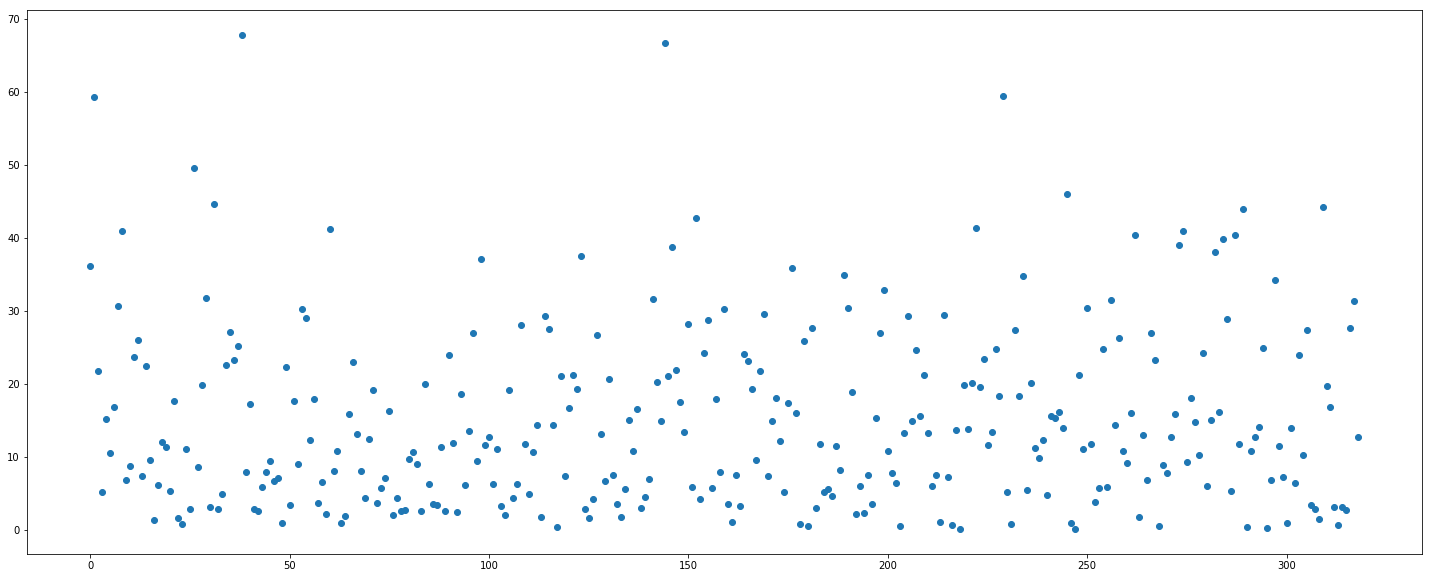

In [13]:
plt.figure(figsize=(25, 10)) 
plt.scatter(matchNoList,RMSList)
plt.show()

In [38]:
F[30](15)



array(122.9394345)

In [43]:
b=90

predictData=[1]
for i in range(11):
    predictData.append(0)
predictData[8+1]=1
predictData.append(15)
predictedScore=results[120-b].predict(predictData)[0]
print(predictedScore)

122.94263116658118


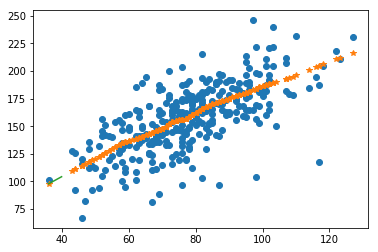

In [23]:
# introduce some floats in our x-values
x = thisBallTotalList
y = totalRunList

# lowess will return our "smoothed" data with a y value for at every x-value
lowess = sm.nonparametric.lowess(y, x, frac=.3)

# unpack the lowess smoothed points to their values
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

# run scipy's interpolation. There is also extrapolation I believe
f = interp1d(lowess_x, lowess_y, bounds_error=False)








xnew = [i/10. for i in range(400)]

# this this generate y values for our xvalues by our interpolator
# it will MISS values outsite of the x window (less than 3, greater than 33)
# There might be a better approach, but you can run a for loop
#and if the value is out of the range, use f(min(lowess_x)) or f(max(lowess_x))
ynew = f(xnew)


plt.plot(x, y, 'o')
plt.plot(lowess_x, lowess_y, '*')
plt.plot(xnew, ynew, '-')
plt.show()

In [5]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [6]:
F2=[]
for j in range(120):
    x = np.array(finalX[j])
    y = np.array(finalY[j])


    regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
    regr.fit(x, y)

    F2.append(regr)

C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklea

C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklea

C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklea

C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\sampr\Anaconda3\lib\site-packages\sklea

In [15]:
RMSListMean=[]
Balls=[]
for b in range(119,0,-1):
    Balls.append(120-b-1)
    totalRunList=[]
#     thisBallTotalList=[]
    predList=[]
    RMSList=[]
    matchNoList=[]
    for matchNo in range(len(matches1st5yrs)):
        matchNoList.append(matchNo)
        try:
#             thisBallTotalList.append(matches1st5yrs[matchNo]['ourData'][b]['totalrunscount'])


            predictData=[]
            for i in range(11):
                predictData.append(0)
            predictData[matches1st5yrs[matchNo]['ourData'][b]['wicketsremaining']+1]=1
            predictData.append(matches1st5yrs[matchNo]['ourData'][b]['totalrunscount'])
            
#             predictedScore=results[120-b].predict(predictData)[0]
            predictedScore=F2[120-b-1].predict([predictData])[0]
            
            predList.append(predictedScore)

            ballRem=list(matches1st5yrs[matchNo]['ourData'].keys())
            ballRem.sort(reverse=True)
            totalRunThisMatch=matches1st5yrs[matchNo]['ourData'][ballRem[-1]]['totalrunscount']

            totalRunList.append(totalRunThisMatch)
            RMSList.append(np.sqrt((predictedScore-totalRunThisMatch)**2)/totalRunThisMatch**2)
            
        except:
            None
    RMSListMean.append(np.mean(RMSList))


In [16]:
fig =plt.figure(figsize=(25, 10)) 
plt.scatter(Balls,RMSListMean)
plt.show()

In [17]:
RMSListMean

[0.0011379264953073908,
 0.0012191632025912282,
 0.0011797579450205326,
 0.0015591074019793945,
 0.001426299977116456,
 0.0013215090143508684,
 0.0014074557490598865,
 0.0014770719844942547,
 0.0014232045904647751,
 0.0013593453377790977,
 0.0014100388473893915,
 0.0013479906482690898,
 0.001319207366402984,
 0.0013582854165554233,
 0.001377113413474179,
 0.0013689299477458571,
 0.0014508934011578946,
 0.0014586144523408868,
 0.0014614433286393625,
 0.0014217627561458391,
 0.001388091470087159,
 0.0014180398704923365,
 0.0014024568432889695,
 0.0013662540308470414,
 0.0013619996060575093,
 0.0013329865443593425,
 0.0013249830984848185,
 0.0012868160207645497,
 0.0012674481750610152,
 0.0012496896692546938,
 0.001282350707864347,
 0.0012492892975503192,
 0.0012589542890813976,
 0.0012550455242776645,
 0.001244053540243888,
 0.0012643854193027033,
 0.0012464281459768488,
 0.001245853362480686,
 0.0012423625762692054,
 0.0012197115816449786,
 0.0012031786688170936,
 0.0012028875564578428,